In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

Modelagem do sistema:

\begin{equation}
\left\{\begin{matrix}
m_1\ddot{x}_1 + \dot{x}_1b + x_1k + x_2k  = 0 \\ 
m_2\ddot{x}_2 + \dot{x}_2k - x_1k = u(t)
\end{matrix}\right.
\end{equation}

Reduzindo a ordem

\begin{equation}
\left\{\begin{matrix}
v = \dot{x} \\ 
\dot{v} = \ddot{x}
\end{matrix}\right.
\end{equation}

\begin{equation}
\left\{\begin{matrix}
m_1\dot{v}_1 + v_1b + x_1k + x_2k  = 0 \\ 
m_2\dot{v}_2 + v_2k - x_1k = u(t)
\end{matrix}\right.
\end{equation}

Assim, temos o sistema:

\begin{equation}
\left\{\begin{matrix}
v_1 = \dot{x}_1 \\
\dot{v}_1 = [- v_1b - x_1k - x_2k]/m_1 \\ 
v_2 = \dot{x}_2 \\
\dot{v}_2 = [- v_2k + x_1k + u(t)]/m_2
\end{matrix}\right.
\end{equation}

In [6]:
m1=m2=10
k=100
b=50

u = lambda t: 3*np.sin(5*t)

def dsdt(t, S):
    x1, v1, x2, v2 = S 
    return [v1, 
           (-v1*b - x1*k + x2*k )/m1,
           v2,
           (-x2*k + x1*k + u(t))/m2]

inter = (0, 10)
t = np.linspace(inter[0], inter[1], 1000)
S0 = (2, 0, 0.5, 0)
sol = solve_ivp(dsdt, t_span=inter, y0=S0, t_eval=t)

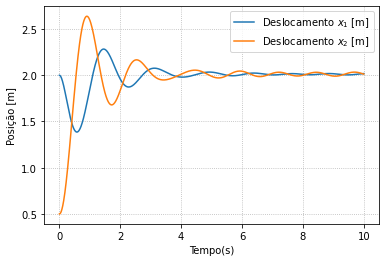

In [7]:
#%matplotlib
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Posição [m]')
ax.plot(sol.t, sol.y[0], label=r'Deslocamento $x_1$ [m]')
ax.plot(sol.t, sol.y[2], label=r'Deslocamento $x_2$ [m]')
ax.legend()
ax.grid(ls='dotted')

fig.savefig('posicao.pdf', bbox_inches='tight', dpi=600)

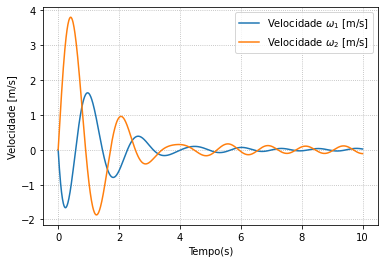

In [8]:
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Velocidade [m/s]')
ax.plot(sol.t, sol.y[1], label=r'Velocidade $\omega_{1}$ [m/s]')
ax.plot(sol.t, sol.y[3], label=r'Velocidade $\omega_{2}$ [m/s]')
ax.legend()
ax.grid(ls='dotted')
fig.savefig('velocidade.pdf', bbox_inches='tight', dpi=600)